<h2>Загрузка датасету</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<h3>Розбиття ознак (X - незалежні ознаки, Y - залежна ознака від інших)</h3>

In [2]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

<h3>Розбиття на тренувальну та тестову вибірки</h3>

In [3]:
from sklearn.model_selection import train_test_split

# Розбиття на тестову та тренувальну вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<h3>Стандартизація значень (за допомогою StarndardScaler)</h3>

In [4]:
from sklearn.preprocessing import StandardScaler

# Стандартизація значень для швидшої роботи
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h3>Побудова kNN</h3>

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10) 

knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=10)

<h3>Прогноз та вивід точності</h3>

In [6]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test) 
accuracy_score(y_test, y_pred) 

accuracy = accuracy_score(y_test, y_pred)
formatted_accuracy = "{:.5f}".format(accuracy)
print("Accuracy with 5 decimal places:", formatted_accuracy)

Accuracy with 5 decimal places: 0.93000


<h3>Находження оптимальних параметрів</h3>

In [7]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 10)}

# Initialize the grid search
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_


<h3>Використання оптимальних параметрів</h3>

In [8]:
from sklearn.metrics import accuracy_score

# Predict using the best k-NN model
y_pred = best_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the optimal model:", accuracy)

print("Original k-NN model parameters:", knn.get_params())
print("Optimal k-NN model parameters:", best_knn.get_params())


Accuracy of the optimal model: 0.93
Original k-NN model parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
Optimal k-NN model parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


<h3>Побудова графіка</h3>

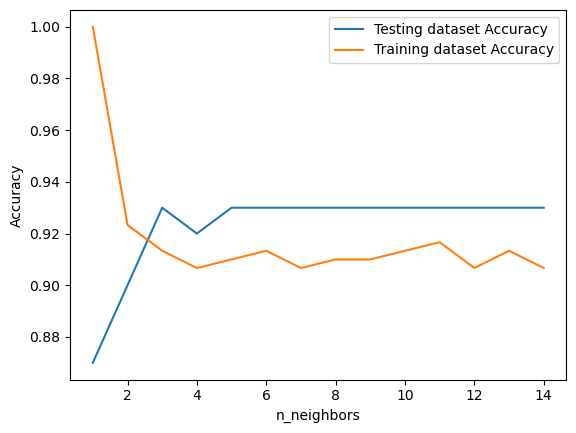

In [9]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
import numpy as np 
import matplotlib.pyplot as plt 

neighbors = np.arange(1, 15) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

# Loop over K values 
for i, k in enumerate(neighbors): 
	knn = KNeighborsClassifier(n_neighbors=k) 
	knn.fit(X_train, y_train) 
	
	# Compute traning and test data accuracy 
	train_accuracy[i] = knn.score(X_train, y_train) 
	test_accuracy[i] = knn.score(X_test, y_test) 

# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 

plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

In [10]:
import warnings
from matplotlib.colors import ListedColormap

def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

C:\Users\amigo\AppData\Local\Temp\ipykernel_13756\1391089333.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


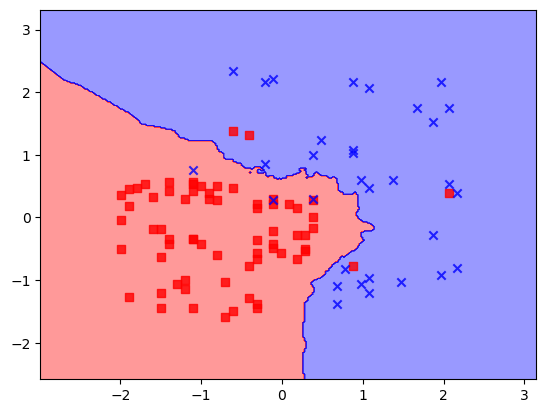

In [11]:
plot_decision_regions(X_test, y_test, knn)